# Exploratory Data Analysis

This notebook focuses on the exploratory analysis of the `Telco Customer Churn` dataset. It aims to uncover initial insights and patterns through visualizations and statistical summaries by understanding feature distributions and examining relationships between features.

**By the end of this notebook, we will have a thorough understanding of the dataset’s characteristics and the interactions between features, setting the stage for effective model development.**

## Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_telco_churn.csv')

## Feature Understanding
*Plotting Feature Distributions*
- Histogram
- KDE
- Boxplot


---------------
FEATURE: GENDER
---------------


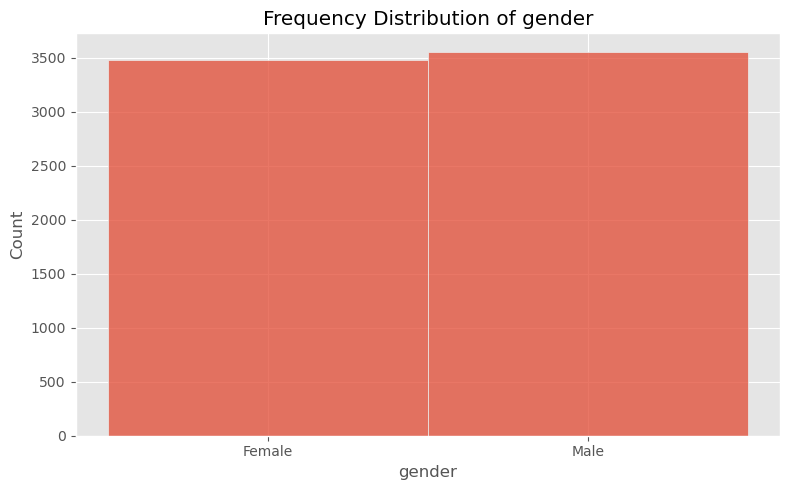


---------------
FEATURE: SENIORCITIZEN
---------------


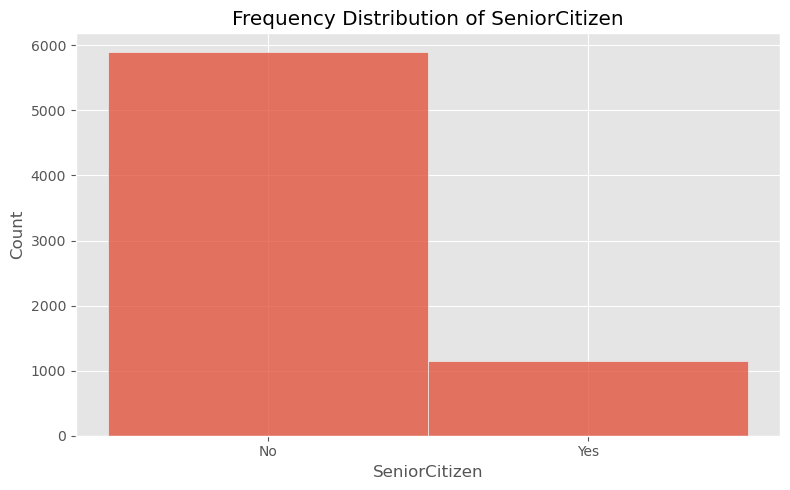


---------------
FEATURE: PARTNER
---------------


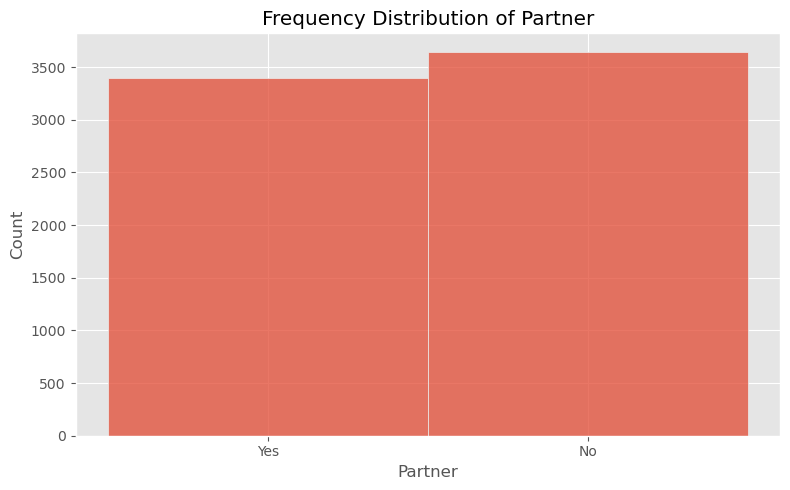


---------------
FEATURE: DEPENDENTS
---------------


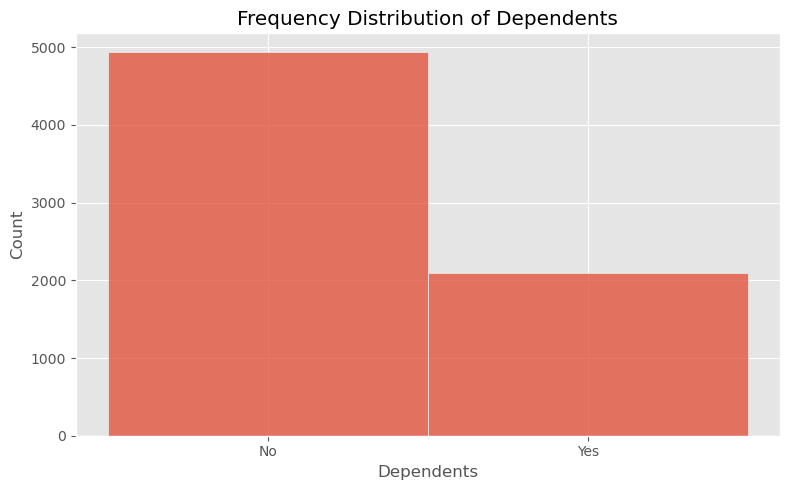


---------------
FEATURE: TENURE
---------------


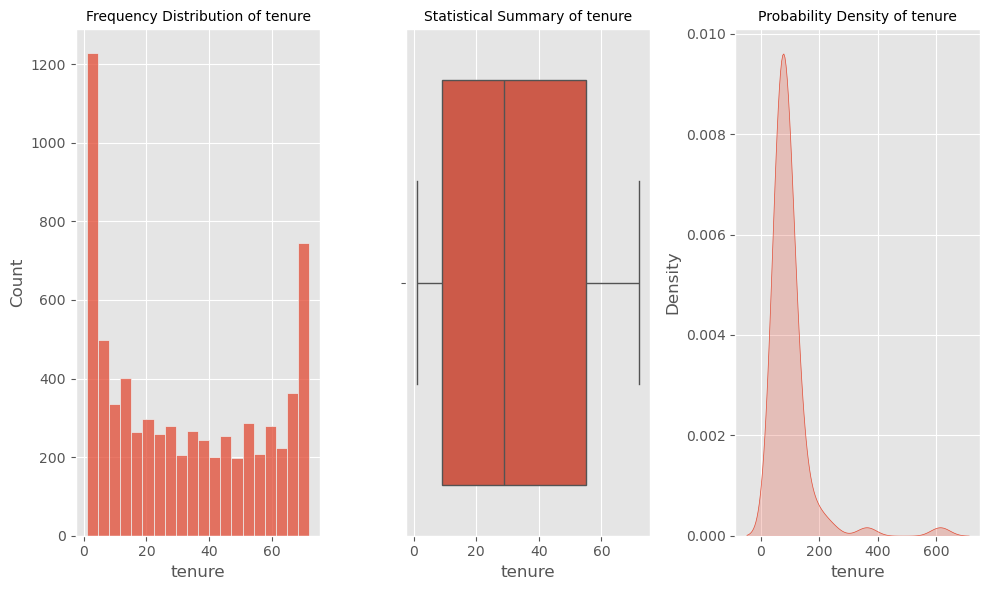


---------------
FEATURE: PHONESERVICE
---------------


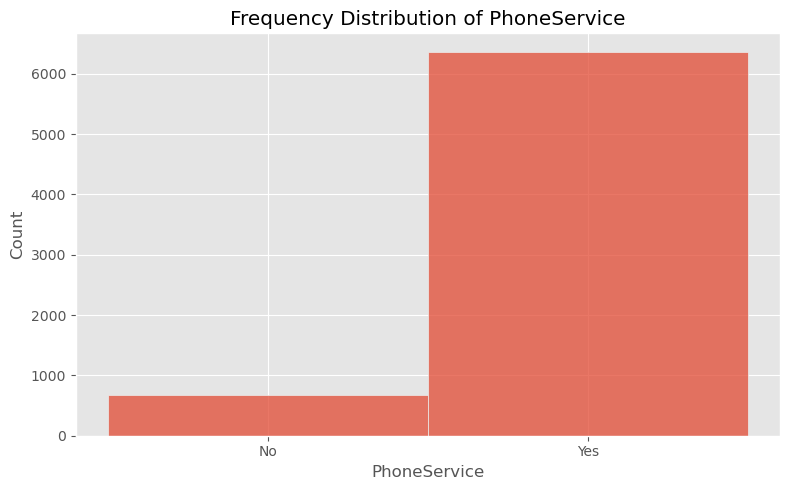


---------------
FEATURE: MULTIPLELINES
---------------


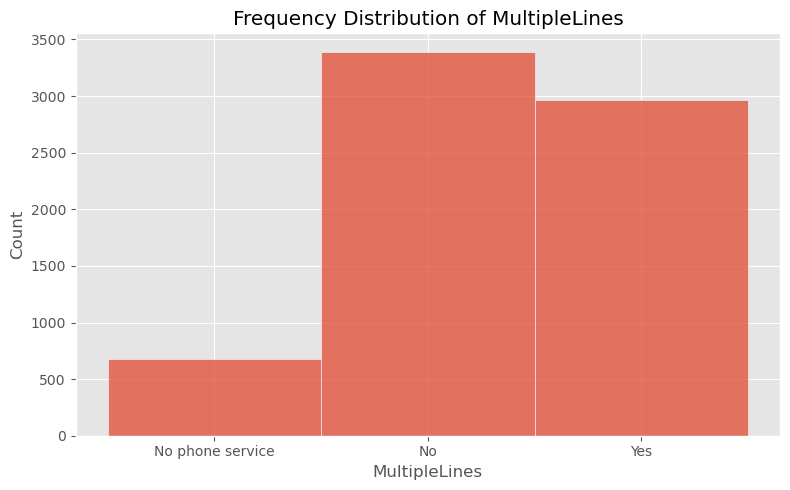


---------------
FEATURE: INTERNETSERVICE
---------------


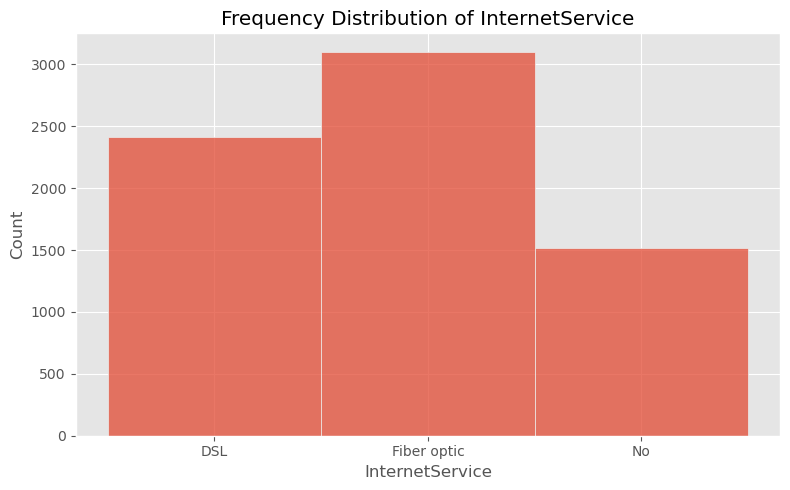


---------------
FEATURE: ONLINESECURITY
---------------


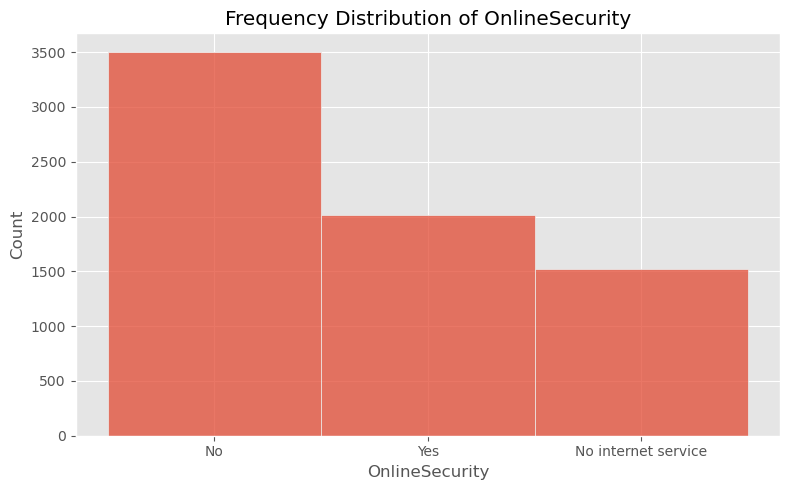


---------------
FEATURE: ONLINEBACKUP
---------------


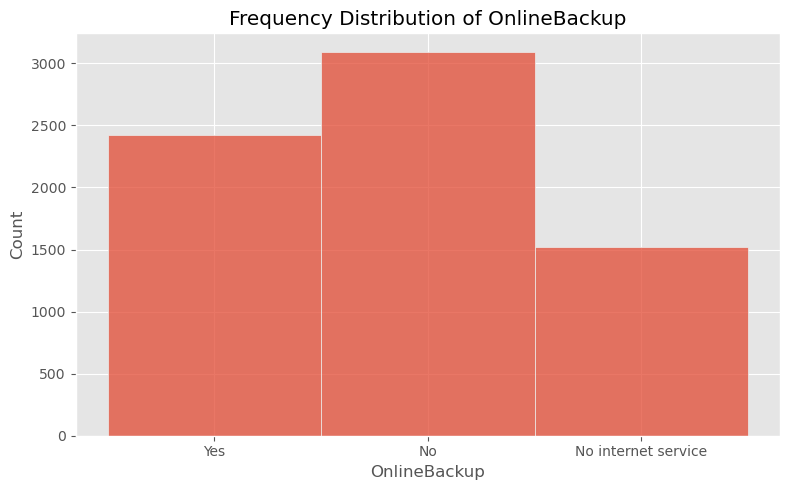


---------------
FEATURE: DEVICEPROTECTION
---------------


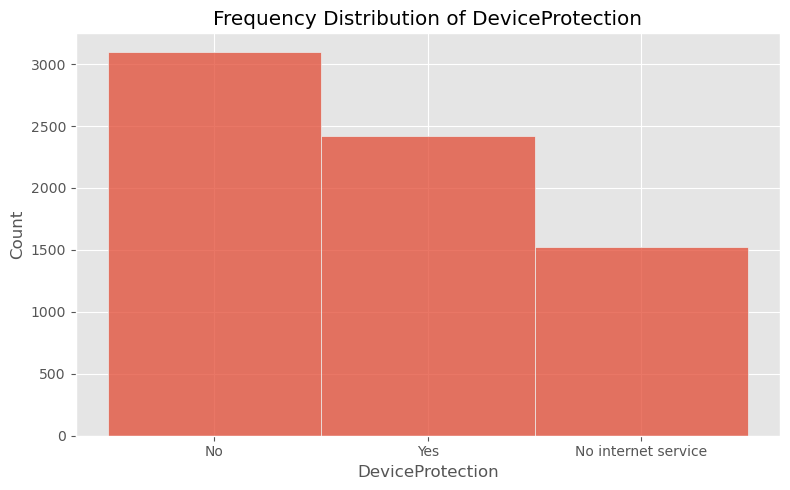


---------------
FEATURE: TECHSUPPORT
---------------


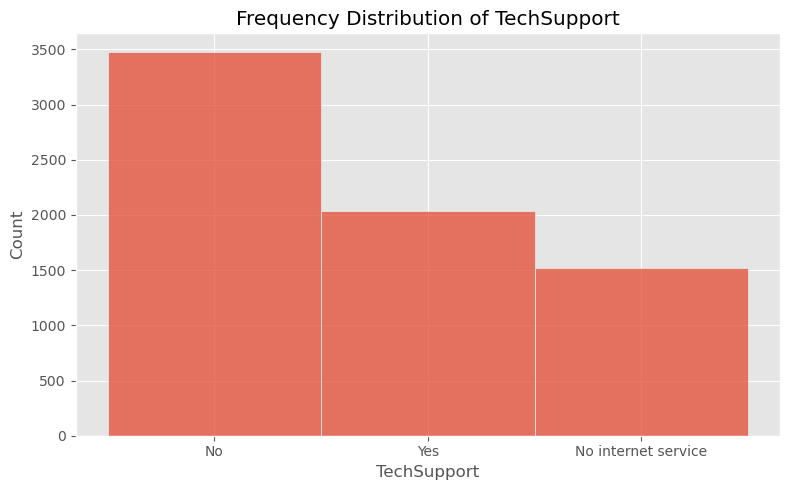


---------------
FEATURE: STREAMINGTV
---------------


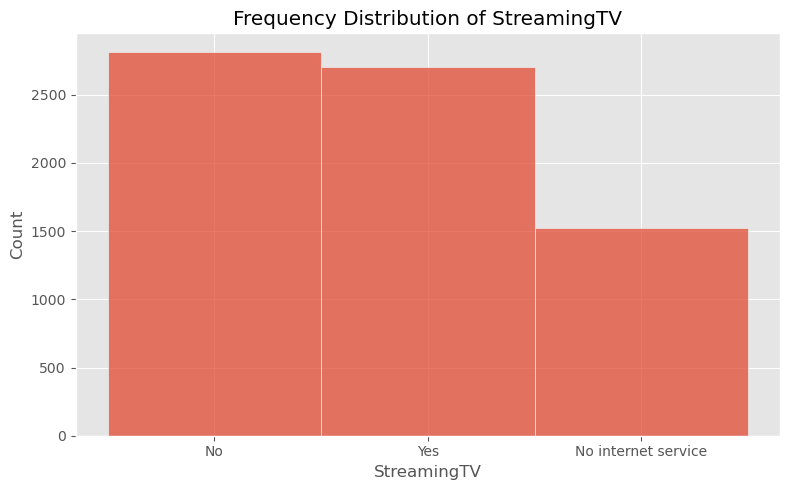


---------------
FEATURE: STREAMINGMOVIES
---------------


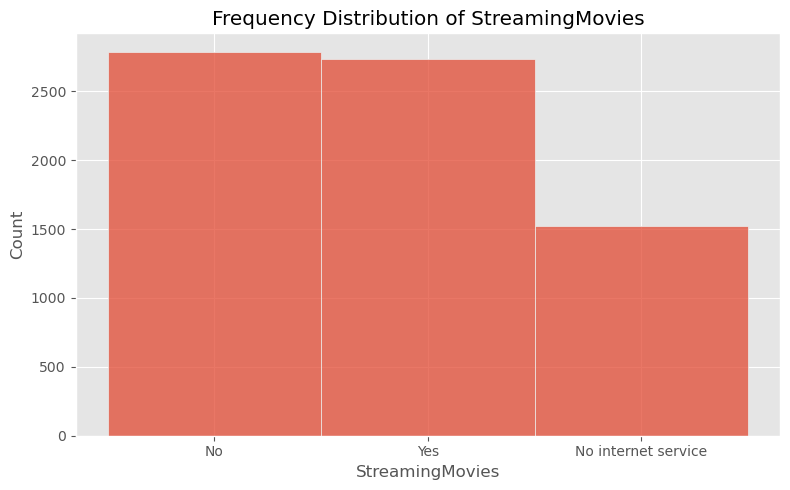


---------------
FEATURE: CONTRACT
---------------


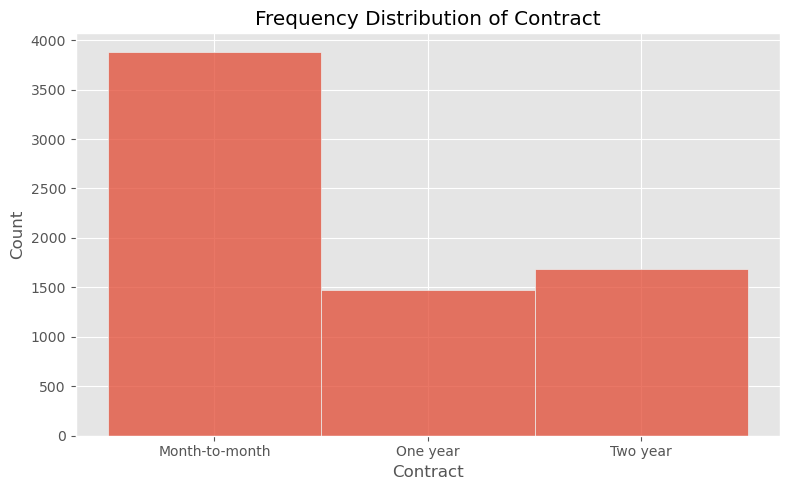


---------------
FEATURE: PAPERLESSBILLING
---------------


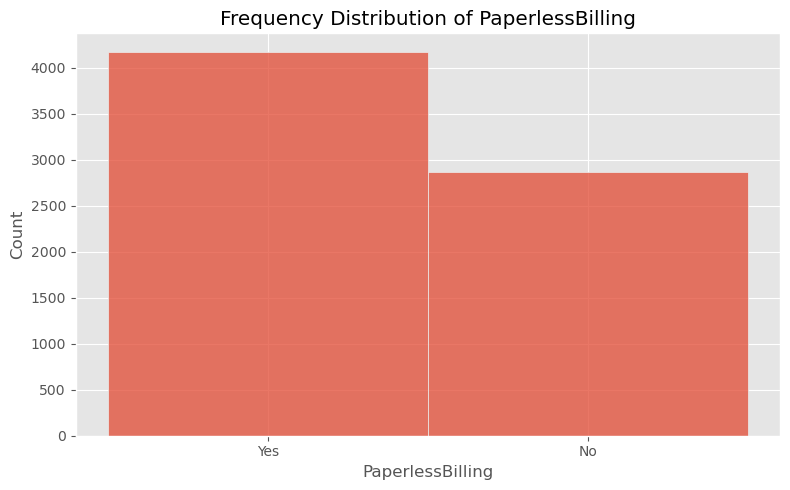


---------------
FEATURE: PAYMENTMETHOD
---------------


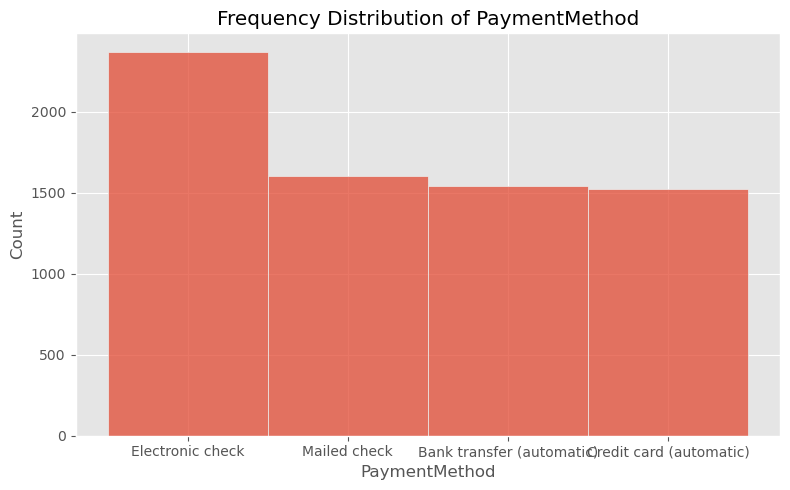


---------------
FEATURE: MONTHLYCHARGES
---------------


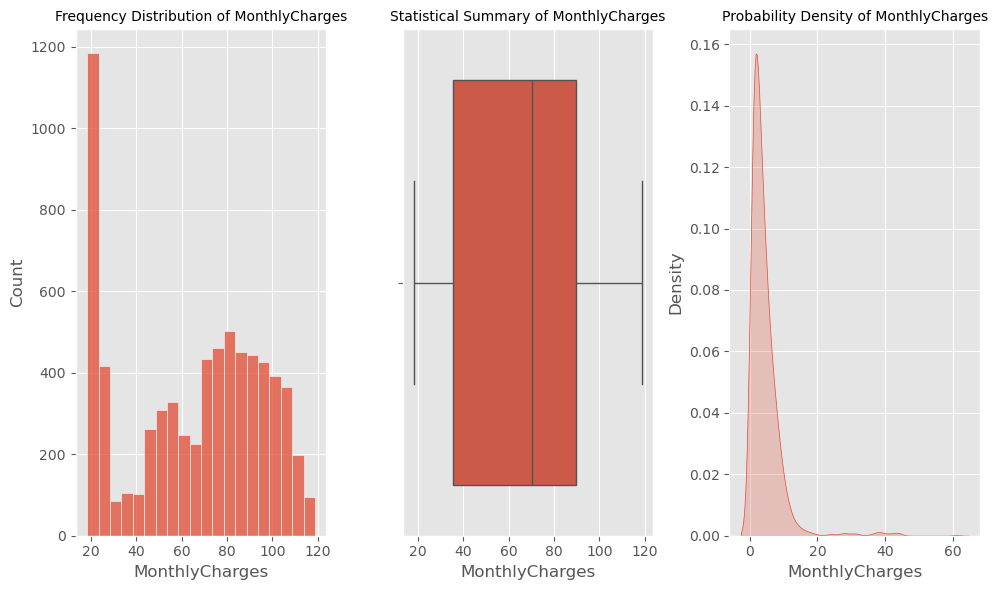


---------------
FEATURE: TOTALCHARGES
---------------


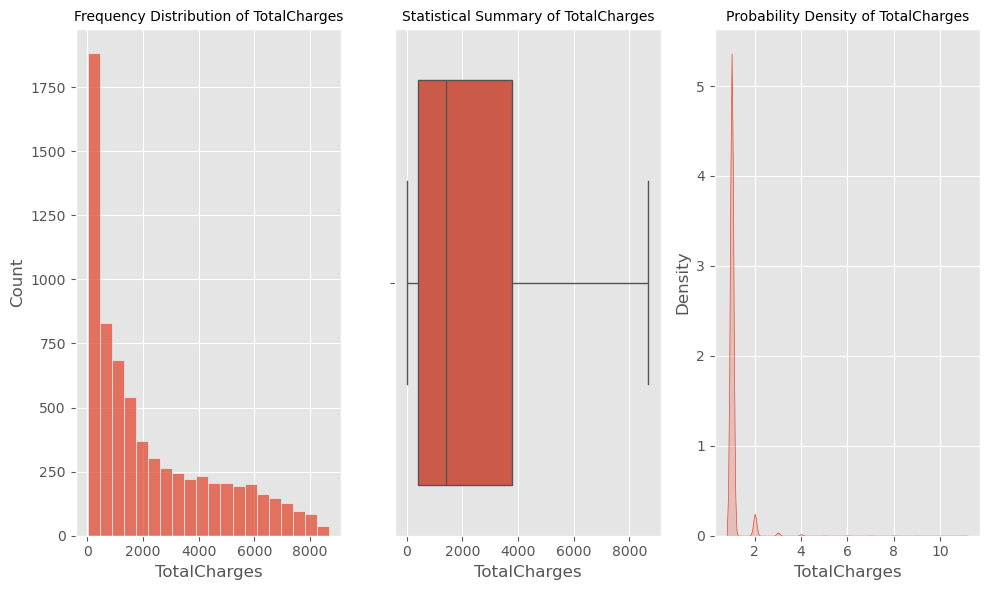


---------------
FEATURE: CHURN
---------------


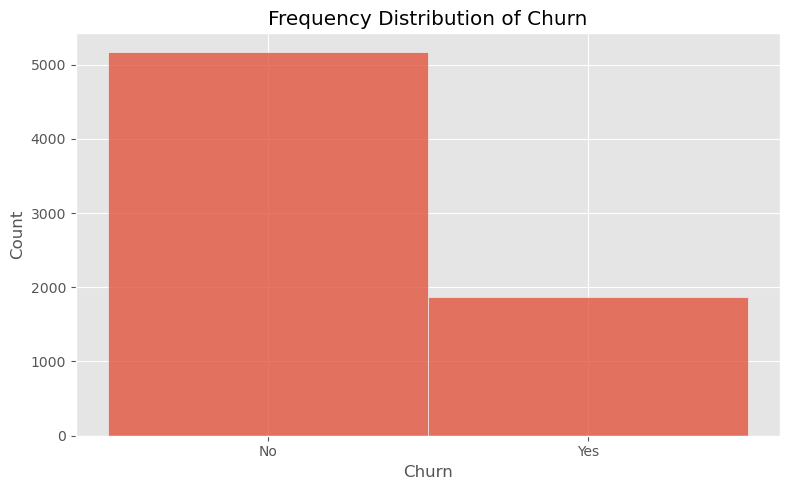

In [2]:
for column in df.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    if len(df[column].unique()) > 4:
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,6))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
        ax1.set_xlabel(column)
        
        sns.boxplot(ax=ax2, x=df[column])
        ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
        ax2.set_xlabel(column)

        sns.kdeplot(ax=ax3, data=df[column].value_counts(), shade=True)
        ax3.set_title(f'Probability Density of {column}', fontsize=10)
        ax3.set_xlabel(column)
        
        plt.tight_layout()
        plt.show()
    else:
        fig, ax1 = plt.subplots(1, figsize=(8,5))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}')
        ax1.set_xlabel(column)

        plt.tight_layout()
        plt.show()

## Feature Relationships
- Scatterplot
- Pairplot
- Heatmap Correlation
- Groupby Comparisons

### Scatterplot of Target Feature

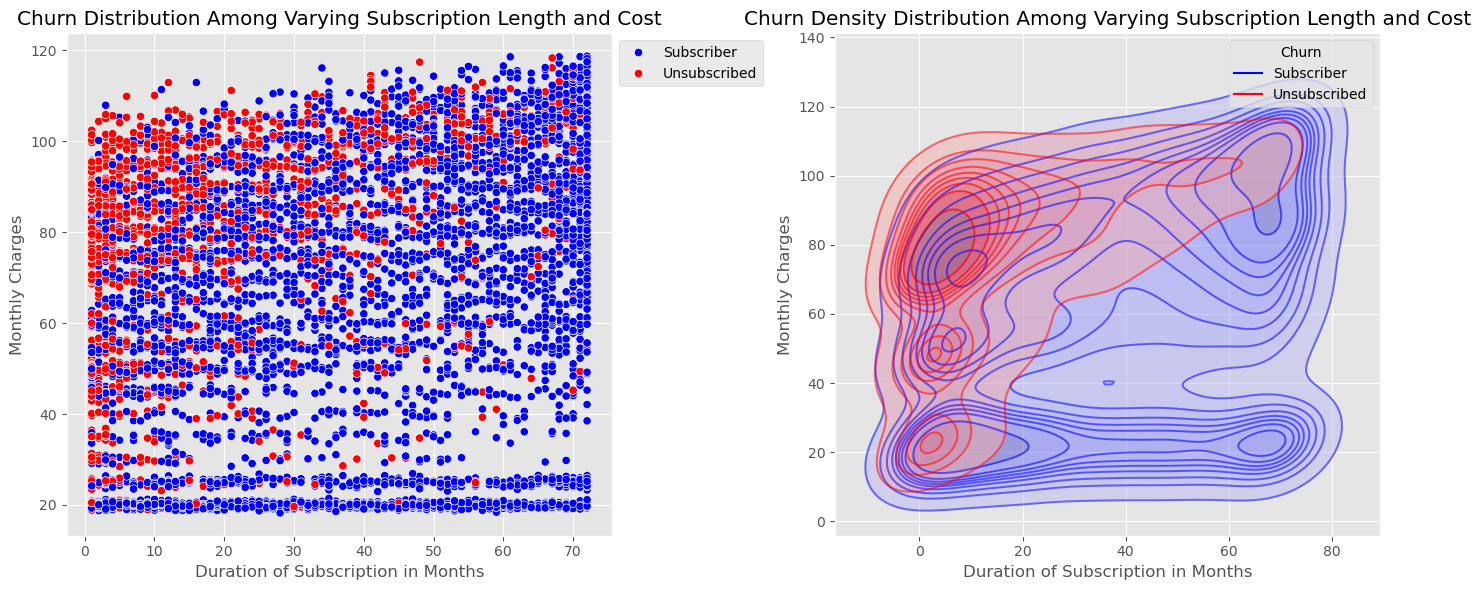

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=ax1, data=df, x='tenure', y='MonthlyCharges', hue='Churn', \
                palette={'Subscriber': 'blue', 'Unsubscribed':'red'})
ax1.set_title('Churn Distribution Among Varying Subscription Length and Cost')
ax1.set_xlabel('Duration of Subscription in Months')
ax1.set_ylabel('Monthly Charges')
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')

sns.kdeplot(ax=ax2, data=df, x='tenure', y='MonthlyCharges', hue='Churn', fill=True, alpha=0.5, \
            palette={'Subscriber': 'blue', 'Unsubscribed': 'red'})
sns.kdeplot(ax=ax2, data=df, x='tenure', y='MonthlyCharges', hue='Churn', \
            palette={'Subscriber': 'blue', 'Unsubscribed': 'red'}, alpha=0.5, linewidth=1)
ax2.set_title('Churn Density Distribution Among Varying Subscription Length and Cost')
ax2.set_xlabel('Duration of Subscription in Months')
ax2.set_ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

## Correlation Heatmap

In [19]:
df_ordinal = df[['Churn','tenure','MonthlyCharges','TotalCharges']]
df_ordinal

,Churn,tenure,MonthlyCharges,TotalCharges
0,Subscriber,1,29.85,29.85
1,Subscriber,34,56.95,"1,889.50"
2,Unsubscribed,2,53.85,108.15
3,Subscriber,45,42.30,"1,840.75"
4,Unsubscribed,2,70.70,151.65
...,...,...,...,...
7027,Subscriber,24,84.80,"1,990.50"
7028,Subscriber,72,103.20,"7,362.90"
7029,Subscriber,11,29.60,346.45
7030,Unsubscribed,4,74.40,306.60


In [ ]:
df.corr()

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix', fontsize=28)
plt.tight_layout()
plt.show()

### Pairplot Relationship of All Features

In [ ]:
sns.pairplot(data=df_internet[['Churn', 'TotalCharges', 'MonthlyCharges', 'DurationMonths']], hue = 'Churn')
plt.tight_layout()
plt.show()

### Groupby Comparisons

### Analytical Questions

In [ ]:
for column in df_internet.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    if len(df[column].unique()) > 2:
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(9,4))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
        ax1.set_xlabel(column)
        
        sns.boxplot(ax=ax2, x=df[column])
        ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
        ax2.set_xlabel(column)

        sns.kdeplot(ax=ax3, data=df[column], shade=True)
        ax3.set_title(f'Probability Density of {column}', fontsize=10)
        ax3.set_xlabel(column)
        
        plt.tight_layout()
        plt.show()
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
        ax1.set_xlabel(column)

        sns.kdeplot(ax=ax2, data=df[column], shade=True)
        ax2.set_title(f'Probability Density of {column}', fontsize=10)
        ax2.set_xlabel(column)
        
        plt.tight_layout()
        plt.show()


In [ ]:
try:
    print('Script Executed Successfully.')
except:
    print('FAILED')